In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(
    fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

In [7]:
df=pd.read_csv("d:/learn/python_statistic/data/ozone2.csv") #데이터파일 로딩
df.head()

,Ozone,Solar.R,Wind,Temp,Result
0,7,185,6.9,74,0
1,28,185,14.9,66,0
2,35,185,7.4,85,0
3,66,185,4.6,87,1
4,78,185,6.9,86,1


In [8]:
df.columns #필드 목록

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Result'], dtype='object')

In [9]:
df.shape #데이터의 형태(차원) 

(153, 5)

In [10]:
df.describe() #기초통계량

,Ozone,Solar.R,Wind,Temp,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.098039,185.888889,9.957516,77.882353,0.529412
std,28.693426,87.960484,3.523001,9.465270,0.500773
min,1.000000,7.000000,1.700000,56.000000,0.000000
25%,21.000000,120.000000,7.400000,72.000000,0.000000
50%,42.000000,194.000000,9.700000,79.000000,1.000000
75%,46.000000,256.000000,11.500000,85.000000,1.000000
max,168.000000,334.000000,20.700000,97.000000,1.000000


In [11]:
df.groupby("Result").mean()  #Result 필드 기준 평균값

,Ozone,Solar.R,Wind,Temp
Result,,,,
0,20.902778,166.263889,11.270833,72.652778
1,60.938272,203.333333,8.790123,82.530864


Text(0, 0.5, '빈도')

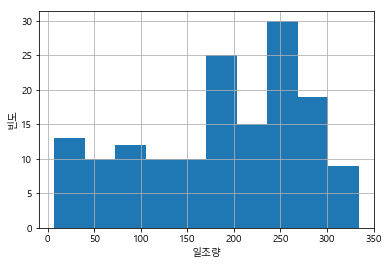

In [12]:
#히스토그램 출력
df["Solar.R"].hist()
plt.xlabel("일조량")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

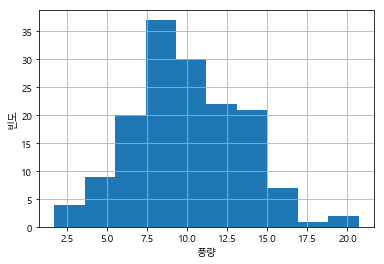

In [13]:
df["Wind"].hist()
plt.xlabel("풍량")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

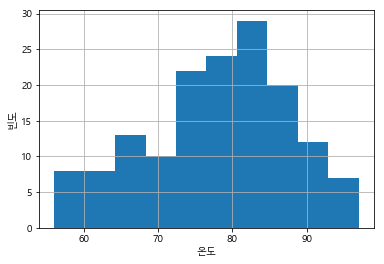

In [14]:
df["Temp"].hist()
plt.xlabel("온도")
plt.ylabel("빈도")

In [15]:
df["Result"].value_counts() #0,1 클래스별 샘플 갯수

1    81
0    72
Name: Result, dtype: int64

Text(0.5, 1.0, '분류\n(0:부족, 1:정상)')

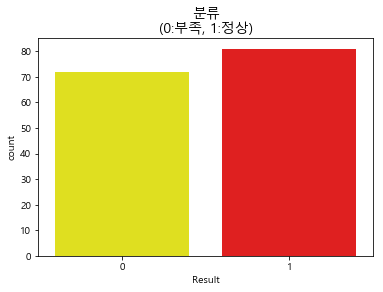

In [16]:
import seaborn as sns
colors=["yellow","red"] #색상 설정
sns.countplot("Result",data=df, palette=colors) #클래스별 카운트
plt.title("분류\n(0:부족, 1:정상)",fontsize=14)

In [17]:
#언더샘플링 더 작은 값들에 맞춤  ex) 72에 맞춤
from imblearn.under_sampling import RandomUnderSampler

cols=["Solar.R", "Wind", "Temp"] #독립변수 필드선택
X=df[cols] #독립변수
y=df["Result"] #종속변수(0,1)

#언더샘플링(샘플수가 적은 데이터를 기준으로 샘플링)
# random_state=0 : seed 고정
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
# x,y 데이터프레임을 연결시킴
X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=["Result"])
df2=pd.concat([X_samp,y_samp],axis=1) # 두 열을 합친다

In [18]:
df2["Result"].value_counts() #클래스별 샘플 갯수 확인

1    72
0    72
Name: Result, dtype: int64

Text(0.5, 1.0, '분류\n(0:부족, 1:정상)')

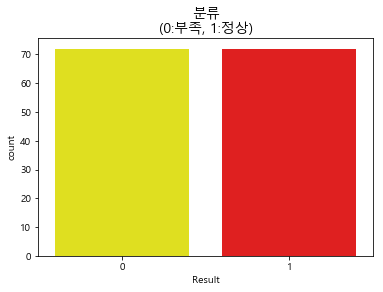

In [19]:
import seaborn as sns
colors=["yellow","red"] #색상 설정
sns.countplot("Result",data=df2, palette=colors) #클래스별 카운트
plt.title("분류\n(0:부족, 1:정상)",fontsize=14)

In [20]:
import statsmodels.api as sm

model=sm.Logit(y,X) #로지스틱 회귀분석 모델 생성
result=model.fit() #모델 훈련(학습)
result.summary2() #요약표
#모델의 설명력 17.2%
#유의하지 않은 변수
#변수의 중요도

Optimization terminated successfully.
         Current function value: 0.572473
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.172     
Dependent Variable: Result           AIC:              181.1768  
Date:               2019-08-22 09:56 BIC:              190.2681  
No. Observations:   153              Log-Likelihood:   -87.588   
Df Model:           2                LL-Null:          -105.79   
Df Residuals:       150              LLR p-value:      1.2491e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0031     0.0021    1.4453   0.1484   -0.0011    0.0073
Wind      -0.2695     0.0543   -4.9647   0.0000   -0.3759   -0.1631
Temp       0.0295     0.0083    3.5652   0.0004    0.0133    0.0457
=================================================================

"""

In [21]:
#유의하지 않은 변수 제거
cols=["Wind","Temp"]
X=X_samp[cols]
y=y_samp["Result"]
df2=pd.concat([X,y],axis=1)

In [22]:
import statsmodels.api as sm

model=sm.Logit(y,X) #로지스틱 회귀분석 모델 생성
result=model.fit() #모델 훈련(학습)
result.summary2() #요약표
#모델의 설명력 16.7%(개선되지 않음)
#유의하지 않은 변수 : 모든 변수가 유의함
#변수의 중요도 : 풍량 > 온도

Optimization terminated successfully.
         Current function value: 0.573751
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.172     
Dependent Variable: Result           AIC:              169.2402  
Date:               2019-08-22 09:56 BIC:              175.1799  
No. Observations:   144              Log-Likelihood:   -82.620   
Df Model:           1                LL-Null:          -99.813   
Df Residuals:       142              LLR p-value:      4.5193e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2781     0.0565   -4.9198   0.0000   -0.3889   -0.1673
Temp       0.0361     0.0074    4.8750   0.0000    0.0216    0.0507
=================================================================

"""

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#전체 데이터셋을 학습용:검증용 8:2로 구분
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

model=LogisticRegression() #로지스틱 회귀 모형 생성
model.fit(X_train, y_train) #모델 훈련(학습)

18     0
71     0
27     0
141    1
2      0
60     0
10     0
76     1
105    1
56     0
108    1
61     0
44     0
66     0
112    1
95     1
92     1
50     0
30     0
131    1
83     1
98     1
62     0
122    1
90     1
113    1
48     0
138    1
73     1
13     0
      ..
130    1
99     1
82     1
64     0
143    1
79     1
69     0
123    1
80     1
115    1
20     0
139    1
72     1
77     1
25     0
81     1
134    1
136    1
39     0
58     0
88     1
70     0
87     1
36     0
21     0
9      0
103    1
67     0
117    1
47     0
Name: Result, Length: 115, dtype: int64


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(model.score(X_train,y_train)) #학습용 데이터셋의 정확도
print(model.score(X_test,y_test)) #검증용 데이터셋의 정확도

0.7130434782608696
0.6206896551724138


In [35]:
pred=model.predict(X_test) #검증용 데이터셋을 입력하여 결과 예측
# print(pred==y_test) # 실제값과 맞으면 True 틀리면 False

ylist=list(y_test)
for idx,val in enumerate(ylist):
    print(val,pred[idx],pred[idx]==val)


0 1 False
1 1 True
1 1 True
0 1 False
1 1 True
1 1 True
0 0 True
0 1 False
1 0 False
0 1 False
1 1 True
1 1 True
0 1 False
0 1 False
0 1 False
0 1 False
0 0 True
0 0 True
1 1 True
0 1 False
1 1 True
1 1 True
0 0 True
1 1 True
0 1 False
1 1 True
0 0 True
1 1 True
1 1 True


In [37]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test) #검증용 데이터를 입력하여 결과값 예측
#혼동행렬, 오분류표 출력
cm=confusion_matrix(y_test, pred)
cm
# 0을 0으로 5개 맞추고 0을 1로 10개 틀림
# 1을 0으로 1개 틀리고 1을 1로 13개 맞춤

array([[ 5, 10],
       [ 1, 13]], dtype=int64)

In [38]:
df_cm=pd.DataFrame(cm, index=[0,1],columns=[0,1])
df_cm

,0,1
0,5,10
1,1,13


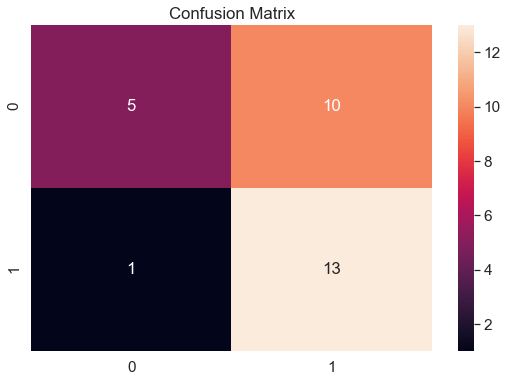

In [39]:
sns.set(font_scale=1.4) #폰트 사이즈 설정
plt.figure(figsize=(9,6)) #그래프의 가로,세로 사이즈(인치)
plt.title("Confusion Matrix") #그래프의 타이틀
sns.heatmap(df_cm, annot=True) #혼동행렬 차트

In [40]:
pred=model.predict(X) #검증용 데이터셋을 입력하여 결과 예측
ylist=list(y)
for idx,val in enumerate(ylist):
    print(val,pred[idx],pred[idx]==val)


0 1 False
0 0 True
0 1 False
0 0 True
0 1 False
0 0 True
0 0 True
0 1 False
0 0 True
0 0 True
0 0 True
0 0 True
0 0 True
0 1 False
0 0 True
0 1 False
0 1 False
0 0 True
0 0 True
0 0 True
0 1 False
0 0 True
0 1 False
0 0 True
0 0 True
0 0 True
0 1 False
0 1 False
0 0 True
0 0 True
0 0 True
0 1 False
0 1 False
0 1 False
0 0 True
0 0 True
0 1 False
0 0 True
0 0 True
0 1 False
0 1 False
0 1 False
0 1 False
0 1 False
0 0 True
0 1 False
0 1 False
0 0 True
0 0 True
0 0 True
0 0 True
0 1 False
0 1 False
0 0 True
0 1 False
0 1 False
0 0 True
0 0 True
0 0 True
0 0 True
0 0 True
0 0 True
0 1 False
0 0 True
0 0 True
0 0 True
0 0 True
0 0 True
0 1 False
0 0 True
0 0 True
0 1 False
1 1 True
1 1 True
1 1 True
1 1 True
1 0 False
1 1 True
1 1 True
1 1 True
1 1 True
1 1 True
1 1 True
1 1 True
1 1 True
1 1 True
1 1 True
1 0 False
1 1 True
1 1 True
1 1 True
1 0 False
1 1 True
1 1 True
1 0 False
1 0 False
1 1 True
1 1 True
1 0 False
1 1 True
1 1 True
1 1 True
1 0 False
1 1 True
1 1 True
1 1 True
1 1 True
1